# <b>SMS Spam Detection by Sanjay Patel

## <b>Agenda

### <b>1. Introduction

- 1.1. What is the data set?

### <b>2. Fetch the Data</b>

- 2.1. Import the libraries
- 2.2. Set up the dataFrame
- 2.3. Basic explaratory data analysis

### <b>3. Cleaning the Data

### <b>4. Working with the Text

### <b>5. Evalute the Data</b>

- 5.1. Assign features and target variables
- 5.2. Bag-of-words using CountVectoriser()
- 5.3. Bag-of-words using TF-IDF
- 5.4. Balancing the Dataset and Re-evaluating

### <b>6. Summary


---

## <b>1. Introduction

#### <b>1.1. What is the Dataset?</b>

The dataset has rows of messages that are labelled as 'spam' and 'non-spam'. My goal is to find an optimal machine learning model to best identify which text is spam and not spam

## <b>2. Fetch the data

#### <b>2.1. Import the Libraries

In [586]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.utils import resample

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [587]:
# import the spam email csv
df = pd.read_csv('sms_train.csv', encoding='unicode_escape')
df_temp = pd.read_csv('sms.test.csv', encoding='unicode_escape')

In [588]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [589]:
df_temp.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [590]:
df = pd.concat([df, df_temp])

In [591]:
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


### <b>2.3. Basic Explaratory Data Analysis

In [592]:
df.shape

(1082, 3)

In [593]:
# check if there are any null values
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [594]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.8+ KB


In [595]:
df['Message_body'] = df['Message_body'].astype('string')

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   string
 2   Label         1082 non-null   object
dtypes: int64(1), object(1), string(1)
memory usage: 33.8+ KB


In [597]:
# remove unnecessary columns
df.drop(columns=['S. No.'], inplace=True)

In [598]:
# change label column to 0s and 1s
df['Label'].replace({'Non-Spam': 0, 'Spam': 1}, inplace=True)

In [599]:
# check if there are any null values
df.isna().sum()

Message_body    0
Label           0
dtype: int64

In [600]:
df.head()

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1


## <b>3. Cleaning the data

In [601]:
def clean_text(text):
    
    # remove full stops
    text = re.sub(r'\.', ' ', text)

    # remove punctuation
    text = re.sub(r'[\[\]\'!?*,()/:-;+=#&^@<>£\"]', '', text)
    text = re.sub(r'ü', 'u', text)
    text = re.sub(r'\s+', ' ', text)


    return text

In [602]:
df['Message_body'] = df['Message_body'].apply(clean_text)

In [603]:
df.sample(10)

,Message_body,Label
801,if you text on your way to cup stop that shoul...,0
24,Ic There are a lotta childporn cars then,0
286,Yeah probably here for a while,0
314,Ok Sweet dreams,0
159,I ask if u meeting da ge tmr nite,0
412,Sir I need Velusamy sirs date of birth and com...,0
213,Tell me something Thats okay,0
782,Indeed and by the way it was either or - not b...,0
792,U repeat e instructions again Wats e road name...,0
340,PRIVATE Your 2003 Account Statement for fone n...,1


## <b>4. Working with the Text

In [604]:
# change all text to lowercase
df['Message_body'] = df['Message_body'].apply(lambda s: s.lower())

In [605]:
df['Message_body']

0                              rofl its true to its name
1      the guy did some bitching but i acted like id ...
2      pity was in mood for that so any other suggest...
3                    will u b going to esplanade fr home
4      this is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in my world 7th you 6th ur style 5th...
121    try to do something dear you read something fo...
122    sun ah thk mayb can if dun have anythin on thk...
123    symptoms when u are in love 1 u like listening...
124     great have a safe trip dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [606]:
stop_words = set(stopwords.words('english'))

In [607]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [608]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text) if w not in stop_words]

In [609]:
df['text_lemmatized'] = df['Message_body'].apply(lemmatize_text)

In [610]:
df

,Message_body,Label,text_lemmatized
0,rofl its true to its name,0,"[rofl, true, name]"
1,the guy did some bitching but i acted like id ...,0,"[guy, bitching, acted, like, id, interested, b..."
2,pity was in mood for that so any other suggest...,0,"[pity, mood, suggestion]"
3,will u b going to esplanade fr home,0,"[u, b, going, esplanade, fr, home]"
4,this is the 2nd time we have tried 2 contact u...,1,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
...,...,...,...
120,7 wonders in my world 7th you 6th ur style 5th...,0,"[7, wonder, world, 7th, 6th, ur, style, 5th, u..."
121,try to do something dear you read something fo...,0,"[try, something, dear, read, something, exam]"
122,sun ah thk mayb can if dun have anythin on thk...,0,"[sun, ah, thk, mayb, dun, anythin, thk, book, ..."
123,symptoms when u are in love 1 u like listening...,0,"[symptom, u, love, 1, u, like, listening, song..."


In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Message_body     1082 non-null   object
 1   Label            1082 non-null   int64 
 2   text_lemmatized  1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.8+ KB


In [612]:
df['text_lemmatized'] = df['text_lemmatized'].astype('string')

In [613]:
df['text_lemmatized'] = df['text_lemmatized'].apply(clean_text)

In [614]:
df

,Message_body,Label,text_lemmatized
0,rofl its true to its name,0,rofl true name
1,the guy did some bitching but i acted like id ...,0,guy bitching acted like id interested buying s...
2,pity was in mood for that so any other suggest...,0,pity mood suggestion
3,will u b going to esplanade fr home,0,u b going esplanade fr home
4,this is the 2nd time we have tried 2 contact u...,1,2nd time tried 2 contact u u 750 pound prize 2...
...,...,...,...
120,7 wonders in my world 7th you 6th ur style 5th...,0,7 wonder world 7th 6th ur style 5th ur smile 4...
121,try to do something dear you read something fo...,0,try something dear read something exam
122,sun ah thk mayb can if dun have anythin on thk...,0,sun ah thk mayb dun anythin thk book e lesson ...
123,symptoms when u are in love 1 u like listening...,0,symptom u love 1 u like listening song 2 u get...


##### Observations
- The texts have been lemmatized

## <b>5. Evaluate the Data

### 5.1. Assign features and target variables

In [615]:
# Features and Labels
X = df['text_lemmatized']
y = df['Label']


### 5.2. Bag-of-Words using CountVectorizer

In [616]:
# init CountVectorizer()
vectorizer = CountVectorizer(stop_words='english')

# fit and transform the model
A = vectorizer.fit_transform(X, y)

In [617]:
df_bow_vec = pd.DataFrame(A.toarray(), columns=vectorizer.get_feature_names_out())
df_bow_vec

,0121,0207,02073162414,020903,021,05,06,061104,07046744435,07099833605,...,youre,youve,yoville,yr,yummy,yuo,yup,zebra,zed,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [618]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(df_bow_vec, y, test_size = 0.2, random_state = 42)

#### 5.2.1. Testing Machine Learning Models

In [619]:
# init and fit the models
lr_model = LogisticRegression().fit(X_train, y_train)
svm_model = SVC(kernel='linear', probability=True).fit(X_train, y_train)
nb_model = GaussianNB().fit(X_train, y_train)
dt_model = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

# transform test set
B = vectorizer.transform(X_test)

# print the scores
print('=== Logistic Regression ===')
print('Train score: ', lr_model.score(X_train, y_train))
print('Test score: ', lr_model.score(X_test, y_test))

print('\n')

print('=== Support Vector Machines ===')
print('Train score: ', svm_model.score(X_train, y_train))
print('Test score: ', svm_model.score(X_test, y_test))

print('\n')

print('=== Naive Bayes ===')
print('Train score: ', nb_model.score(X_train, y_train))
print('Test score: ', nb_model.score(X_test, y_test))

print('\n')

print('=== Decision Trees ===')
print('Train score: ', dt_model.score(X_train, y_train))
print('Test score: ', dt_model.score(X_test, y_test))

=== Logistic Regression ===
Train score:  0.9965317919075144
Test score:  0.9447004608294931


=== Support Vector Machines ===
Train score:  1.0
Test score:  0.9631336405529954


=== Naive Bayes ===
Train score:  0.9653179190751445
Test score:  0.8894009216589862


=== Decision Trees ===
Train score:  0.915606936416185
Test score:  0.9078341013824884


In [620]:
# get predictions for each model
lr_predict = lr_model.predict(X_test)
svm_predict = svm_model.predict(X_test)
nb_predict = nb_model.predict(X_test)
dt_predict = dt_model.predict(X_test)


# get probability for each model
lr_proba = lr_model.predict_proba(X_test)[:, 1]
svm_proba = svm_model.predict_proba(X_test)[:, 1]
nb_proba = nb_model.predict_proba(X_test)[:, 1]
dt_proba = dt_model.predict_proba(X_test)[:, 1]

# calculate fpr and tpr for each model
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, lr_proba)
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm_proba)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, nb_proba)
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, dt_proba)

# calculate roc curve for each model
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

In [621]:
dt_proba

array([0.08707124, 0.08707124, 0.08707124, 0.87755102, 0.08707124,
       0.08707124, 0.08707124, 1.        , 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.87755102, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 1.        , 0.08707124,
       0.08707124, 0.08707124, 0.08707124, 0.08707124, 0.08707124,
       0.08707124, 0.08707124, 0.92857143, 0.08707124, 0.08707

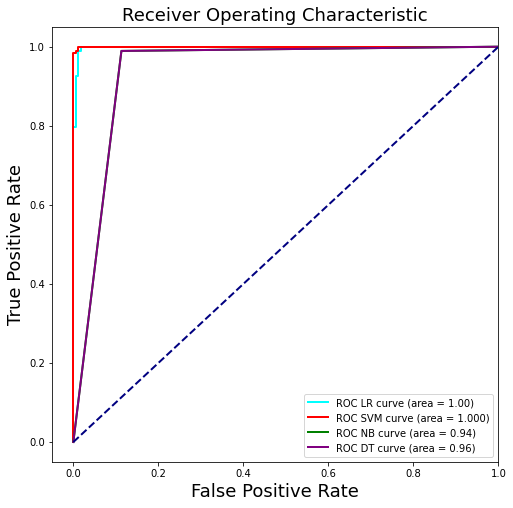

In [647]:
# set figure size
plt.figure(figsize=[8,8])

# plot each of the models
plt.plot(fpr_lr, tpr_lr, color='cyan', lw = 2, label = 'ROC LR curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='r', lw = 2, label = 'ROC SVM curve (area = %0.3f)' % roc_auc_svm)
plt.plot(fpr_nb, tpr_nb, color='g', lw = 2, label = 'ROC NB curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nb, tpr_nb, color='purple', lw = 2, label = 'ROC DT curve (area = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [623]:
# helper function to show results and charts
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, probabilities)
    average_precision = average_precision_score(actual, probabilities)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)




========== LOGISTIC REGRESSION ==========


Accuracy : 0.9447 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6667 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9972                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


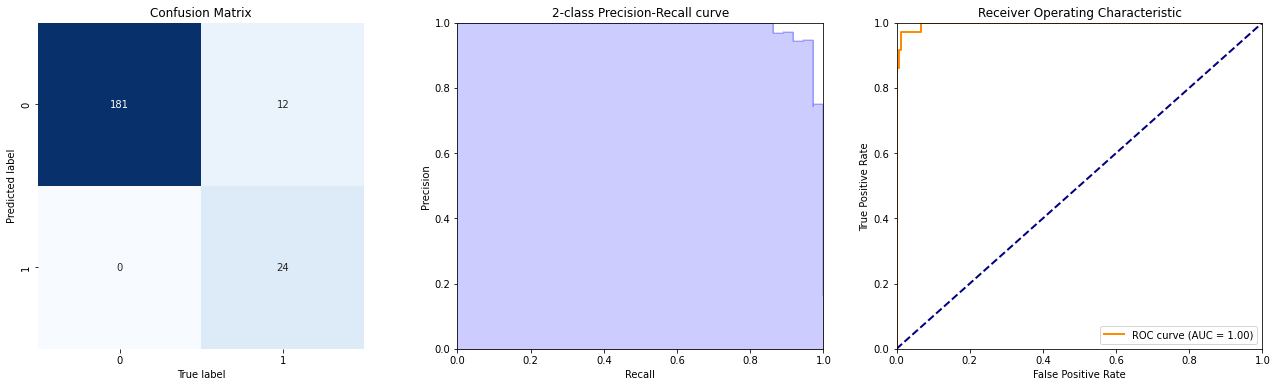




==========SUPPORT VECTOR MACHINES ==========


Accuracy : 0.9631 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7778 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9962                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


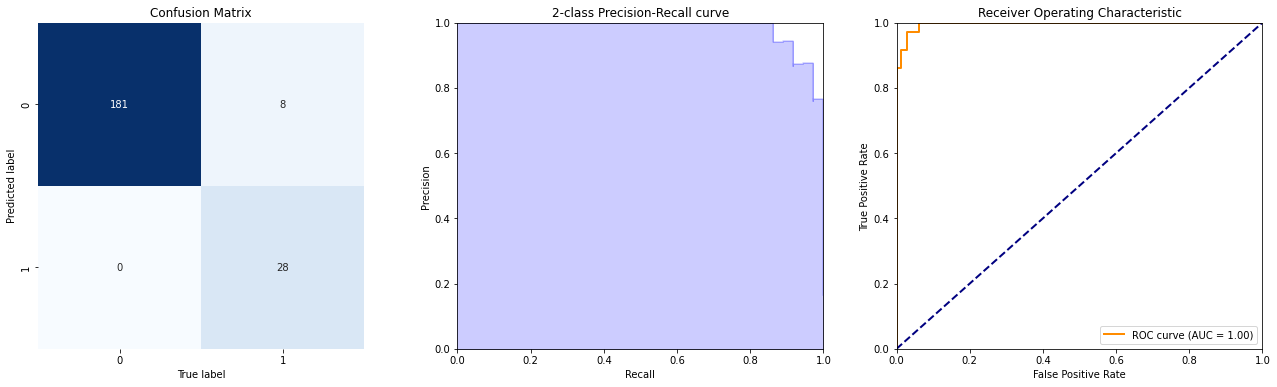




========== NAIVE BAYES ==========


Accuracy : 0.8894 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6111 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9167 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9003                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


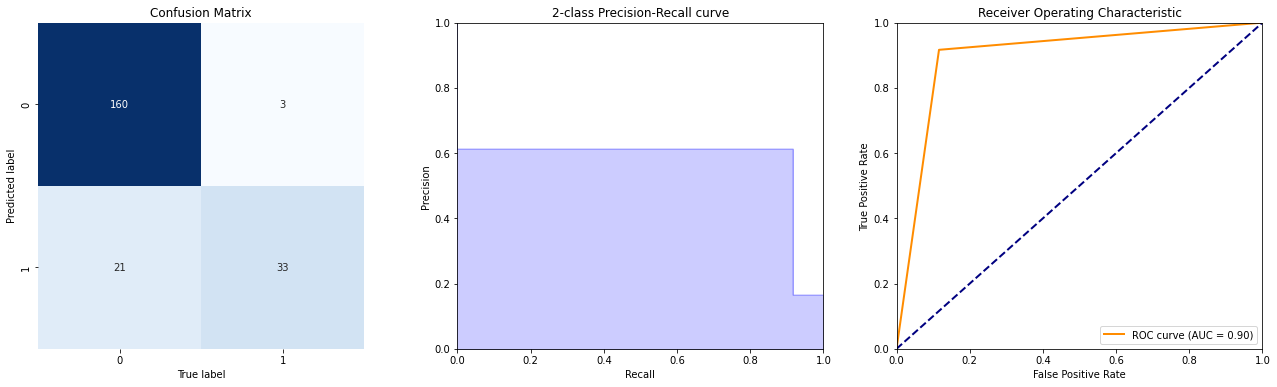




========== DECISION TREES ==========


Accuracy : 0.9078 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7452                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


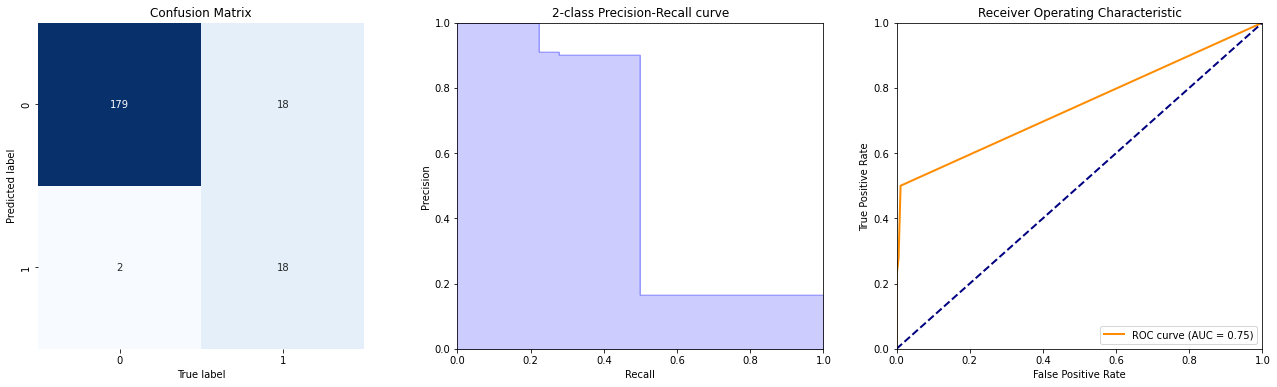

(0.9078341013824884, 0.9, 0.5, 0.7452424800491099)

In [624]:
# summary reports of each of the models
print('\n\n')
print('========== LOGISTIC REGRESSION ==========')
print('\n')
show_summary_report(y_test, lr_predict, lr_proba)

print('\n\n')

print('==========SUPPORT VECTOR MACHINES ==========')
print('\n')
show_summary_report(y_test, svm_predict, svm_proba)

print('\n\n')

print('========== NAIVE BAYES ==========')
print('\n')
show_summary_report(y_test, nb_predict, nb_proba)


print('\n\n')

print('========== DECISION TREES ==========')
print('\n')
show_summary_report(y_test, dt_predict, dt_proba)

### 5.3. Bag-of-Words using TF-IDF

In [625]:
# init TfidfVectorizer()
tfidf = TfidfVectorizer(stop_words='english')

# fit and transform the model
B = tfidf.fit_transform(X, y)

In [626]:

df_bow_tfidf = pd.DataFrame(B.toarray(), columns=tfidf.get_feature_names_out())
df_bow_tfidf

,0121,0207,02073162414,020903,021,05,06,061104,07046744435,07099833605,...,youre,youve,yoville,yr,yummy,yuo,yup,zebra,zed,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [627]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(df_bow_tfidf, y, test_size = 0.2, random_state = 42)

#### 5.3.1. Testing Machine Learning Models

In [628]:
lr_tfid_model = LogisticRegression().fit(X_train, y_train)
svm_tfidf_model = SVC(probability=True).fit(X_train, y_train)
nb_tfidf_model = GaussianNB().fit(X_train, y_train)
dt_tfidf_model = DecisionTreeClassifier().fit(X_train, y_train)

# print the scores
print('=== Logistic Regression ===')
print('Train score: ', lr_tfid_model.score(X_train, y_train))
print('Test score: ', lr_tfid_model.score(X_test, y_test))

print('\n')

print('=== Support Vector Machines ===')
print('Train score: ', svm_tfidf_model.score(X_train, y_train))
print('Test score: ', svm_tfidf_model.score(X_test, y_test))

print('\n')

print('=== Naive Bayes ===')
print('Train score: ', nb_tfidf_model.score(X_train, y_train))
print('Test score: ', nb_tfidf_model.score(X_test, y_test))

print('\n')

print('=== Decision Trees ===')
print('Train score: ', dt_tfidf_model.score(X_train, y_train))
print('Test score: ', dt_tfidf_model.score(X_test, y_test))

=== Logistic Regression ===
Train score:  0.923699421965318
Test score:  0.9032258064516129


=== Support Vector Machines ===
Train score:  1.0
Test score:  0.9216589861751152


=== Naive Bayes ===
Train score:  0.9653179190751445
Test score:  0.8986175115207373


=== Decision Trees ===
Train score:  1.0
Test score:  0.9447004608294931


##### Observations
- There is overfitting of the data
    - Although the Logistic Regression Model is doing better

In [629]:
# get predictions for each model
lr_predict = lr_tfid_model.predict(X_test)
svm_predict = svm_tfidf_model.predict(X_test)
nb_predict = nb_tfidf_model.predict(X_test)
dt_predict = dt_tfidf_model.predict(X_test)


# get probability for each model
lr_proba = lr_tfid_model.predict_proba(X_test)[:, 1]
svm_proba = svm_tfidf_model.predict_proba(X_test)[:, 1]
nb_proba = nb_tfidf_model.predict_proba(X_test)[:, 1]
dt_proba = dt_tfidf_model.predict_proba(X_test)[:, 1]

# calculate fpr and tpr for each model
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, lr_proba)
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm_proba)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, nb_proba)
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, dt_proba)

# calculate roc curve for each model
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

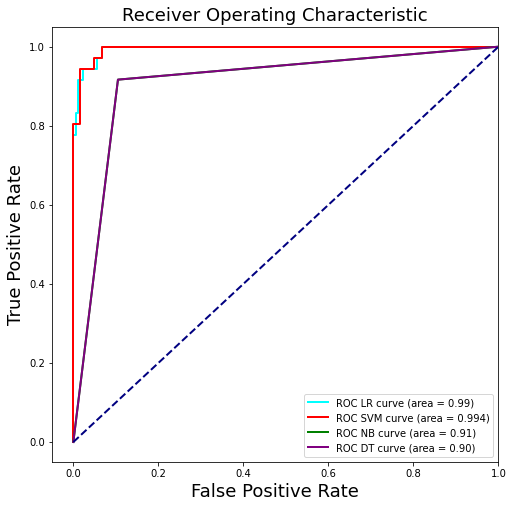

In [630]:
# set figure size
plt.figure(figsize=[8,8])

# plot each of the models
plt.plot(fpr_lr, tpr_lr, color='cyan', lw = 2, label = 'ROC LR curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='r', lw = 2, label = 'ROC SVM curve (area = %0.3f)' % roc_auc_svm)
plt.plot(fpr_nb, tpr_nb, color='g', lw = 2, label = 'ROC NB curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nb, tpr_nb, color='purple', lw = 2, label = 'ROC DT curve (area = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()




========== LOGISTIC REGRESSION ==========


Accuracy : 0.9032 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.4167 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9948                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


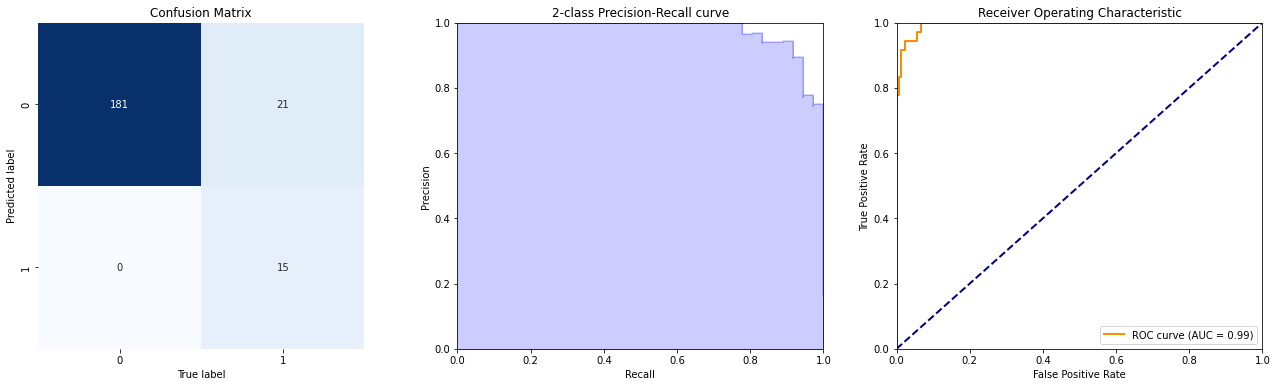




==========SUPPORT VECTOR MACHINES ==========


Accuracy : 0.9217 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5278 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9945                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


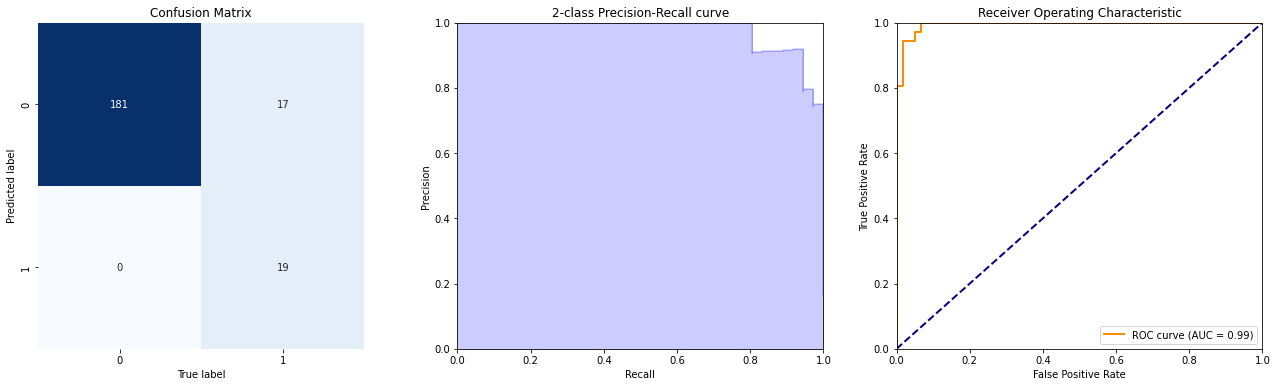




========== NAIVE BAYES ==========


Accuracy : 0.8986 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6346 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9167 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9058                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


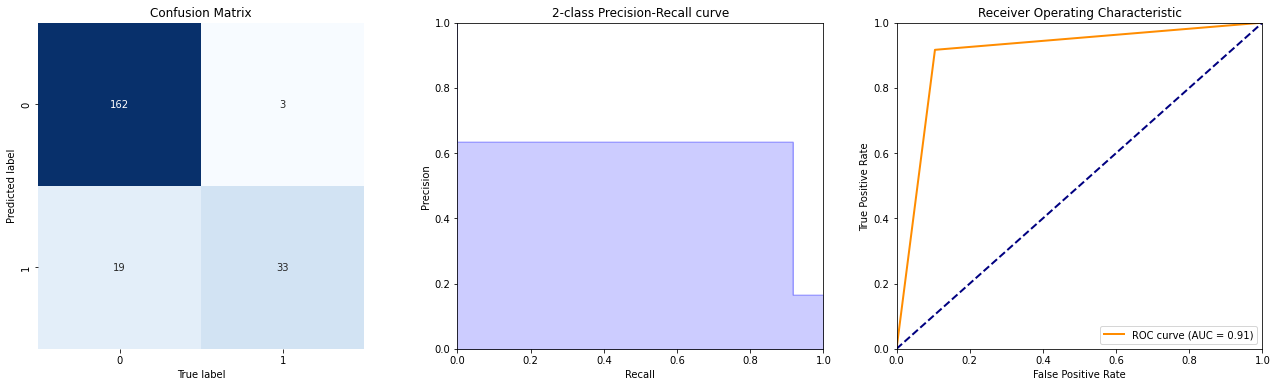




========== DECISION TREES ==========


Accuracy : 0.9447 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8333 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9001                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


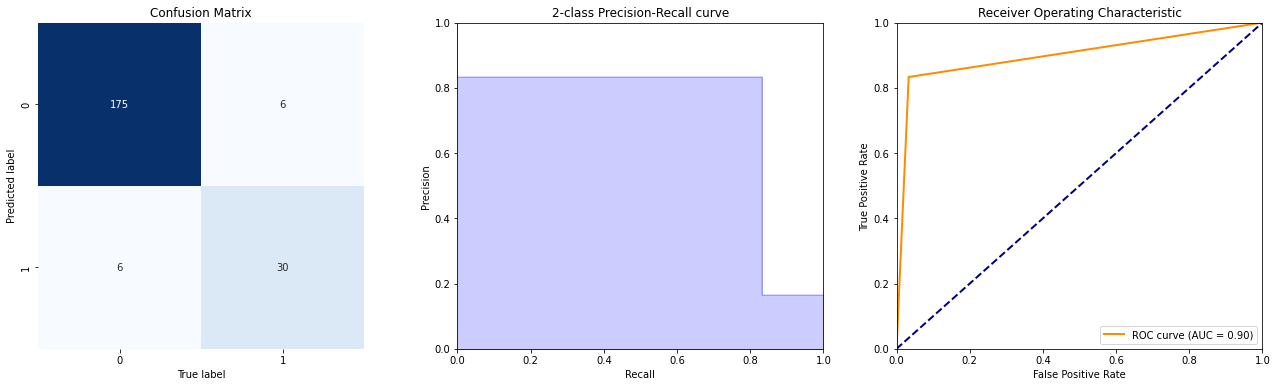

(0.9447004608294931,
 0.8333333333333334,
 0.8333333333333334,
 0.9000920810313077)

In [631]:
# summary reports of each of the models
print('\n\n')
print('========== LOGISTIC REGRESSION ==========')
print('\n')
show_summary_report(y_test, lr_predict, lr_proba)

print('\n\n')

print('==========SUPPORT VECTOR MACHINES ==========')
print('\n')
show_summary_report(y_test, svm_predict, svm_proba)

print('\n\n')

print('========== NAIVE BAYES ==========')
print('\n')
show_summary_report(y_test, nb_predict, nb_proba)


print('\n\n')

print('========== DECISION TREES ==========')
print('\n')
show_summary_report(y_test, dt_predict, dt_proba)

##### Observations
- There is a low recall rate
    - Suggested that the dataset may be imbalanced
- Spam detection prefers high precision as we don't want to misclassify important messages that are non-spam

### 5.4. Balancing the Dataset and Re-evaluating

#### 5.4.1. Resampling the dataset

In [632]:
df['Label'].value_counts()

0    884
1    198
Name: Label, dtype: int64

##### Observations
- Confirms our findings - dataset was imbalanced

In [633]:
df_minority = df[df['Label'] == 1]

In [634]:
df_minority

,Message_body,Label,text_lemmatized
4,this is the 2nd time we have tried 2 contact u...,1,2nd time tried 2 contact u u 750 pound prize 2...
5,reminder from o2 to get 2 50 pounds free call ...,1,reminder o2 get 2 50 pound free call credit de...
30,asked 3mobile if 0870 chatlines inclu in free ...,1,asked 3mobile 0870 chatlines inclu free min in...
33,want explicit sex in 30 secs ring 02073162414 ...,1,want explicit sex 30 sec ring 02073162414 cost...
44,private your 2003 account statement for shows ...,1,private 2003 account statement show 800 un-red...
...,...,...,...
97,urgent call 09066350750 from your landline you...,1,urgent call 09066350750 landline complimentary...
98,had your contract mobile 11 mnths latest motor...,1,contract mobile 11 mnths latest motorola nokia...
99,congratulations ur awarded 500 of cd vouchers ...,1,congratulation ur awarded 500 cd voucher 125gi...
102,urgent this is the 2nd attempt to contact uu h...,1,urgent 2nd attempt contact uu 1000call 0907151...


In [635]:
#create two different dataframe of majority and minority class 
df_majority = df[(df['Label']==0)] 
df_minority = df[(df['Label']==1)]

In [636]:
df_minority_upsampled = resample(df_minority, 
                                replace=True,    # sample with replacement
                                n_samples= 884, # to match majority class
                                random_state=42)  # reproducible results

In [637]:
df_minority_upsampled

,Message_body,Label,text_lemmatized
799,your unique user id is 1172 for removal send s...,1,unique user id 1172 removal send stop 87239 cu...
57,thanks for your subscription to ringtone uk yo...,1,thanks subscription ringtone uk mobile charged...
704,free messagethanks for using the auction subsc...,1,free messagethanks using auction subscription ...
108,txt call to no 86888 claim your reward of 3 ho...,1,txt call 86888 claim reward 3 hour talk time u...
815,your weekly cool-mob tones are ready to downlo...,1,weekly cool-mob tone ready download week new t...
...,...,...,...
540,ur cash-balance is currently 500 pounds - to m...,1,ur cash-balance currently 500 pound - maximize...
300,if you dont your prize will go to another cust...,1,dont prize go another customer tc www t-c biz ...
46,you are awarded a sipix digital camera call 09...,1,awarded sipix digital camera call 09061221061 ...
456,december only had your mobile 11mths you are e...,1,december mobile 11mths entitled update latest ...


In [638]:
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [639]:
df_upsampled['Label'].value_counts()

1    884
0    884
Name: Label, dtype: int64

In [640]:
# init TfidfVectorizer()
tfidf_upsampled = TfidfVectorizer(stop_words='english')

# fit and transform the model
C = tfidf_upsampled.fit_transform(df_upsampled['text_lemmatized'], df_upsampled['Label'])
C

<1768x3199 sparse matrix of type '<class 'numpy.float64'>'
	with 18552 stored elements in Compressed Sparse Row format>

In [650]:
df_upsampled_bow_tfidf = pd.DataFrame(C.toarray(), columns=tfidf_upsampled.get_feature_names_out())
df_upsampled_bow_tfidf

,0121,0207,02073162414,020903,021,05,06,061104,07046744435,07099833605,...,youre,youve,yoville,yr,yummy,yuo,yup,zebra,zed,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 5.4.1 Testing Machine Learning Models

In [642]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(df_upsampled_bow_tfidf, df_upsampled['Label'], test_size = 0.2, random_state = 42)

In [643]:
lr_upsampled_tfid_model = LogisticRegression().fit(X_train, y_train)
svm_upsampled_tfidf_model = SVC(probability=True).fit(X_train, y_train)
nb_upsampled_tfidf_model = GaussianNB().fit(X_train, y_train)
dt_upsampled_tfidf_model = DecisionTreeClassifier().fit(X_train, y_train)

# print the scores
print('=== Logistic Regression ===')
print('Train score: ', lr_upsampled_tfid_model.score(X_train, y_train))
print('Test score: ', lr_upsampled_tfid_model.score(X_test, y_test))

print('\n')

print('=== Support Vector Machines ===')
print('Train score: ', svm_upsampled_tfidf_model.score(X_train, y_train))
print('Test score: ', svm_upsampled_tfidf_model.score(X_test, y_test))

print('\n')

print('=== Naive Bayes ===')
print('Train score: ', nb_upsampled_tfidf_model.score(X_train, y_train))
print('Test score: ', nb_upsampled_tfidf_model.score(X_test, y_test))

print('\n')

print('=== Decision Trees ===')
print('Train score: ', dt_upsampled_tfidf_model.score(X_train, y_train))
print('Test score: ', dt_upsampled_tfidf_model.score(X_test, y_test))

=== Logistic Regression ===
Train score:  0.9936350777934936
Test score:  0.9830508474576272


=== Support Vector Machines ===
Train score:  1.0
Test score:  0.9887005649717514


=== Naive Bayes ===
Train score:  0.9794908062234795
Test score:  0.940677966101695


=== Decision Trees ===
Train score:  1.0
Test score:  0.9661016949152542


In [644]:
# get predictions for each model
lr_predict = lr_upsampled_tfid_model.predict(X_test)
svm_predict = svm_upsampled_tfidf_model.predict(X_test)
nb_predict = nb_upsampled_tfidf_model.predict(X_test)
dt_predict = dt_upsampled_tfidf_model.predict(X_test)


# get probability for each model
lr_proba = lr_upsampled_tfid_model.predict_proba(X_test)[:, 1]
svm_proba = svm_upsampled_tfidf_model.predict_proba(X_test)[:, 1]
nb_proba = nb_upsampled_tfidf_model.predict_proba(X_test)[:, 1]
dt_proba = dt_upsampled_tfidf_model.predict_proba(X_test)[:, 1]

# calculate fpr and tpr for each model
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, lr_proba)
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm_proba)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, nb_proba)
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, dt_proba)

# calculate roc curve for each model
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

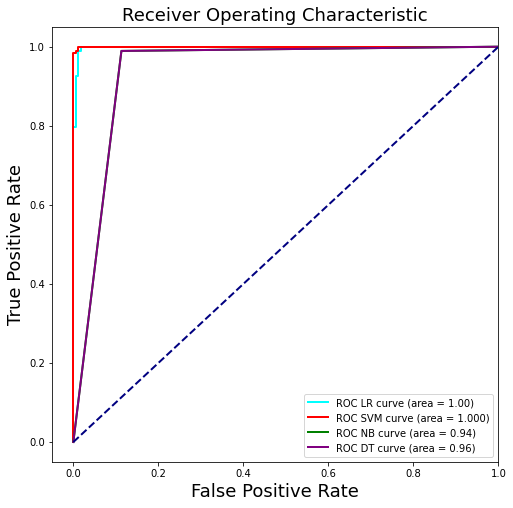

In [645]:
# set figure size
plt.figure(figsize=[8,8])

# plot each of the models
plt.plot(fpr_lr, tpr_lr, color='cyan', lw = 2, label = 'ROC LR curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='r', lw = 2, label = 'ROC SVM curve (area = %0.3f)' % roc_auc_svm)
plt.plot(fpr_nb, tpr_nb, color='g', lw = 2, label = 'ROC NB curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nb, tpr_nb, color='purple', lw = 2, label = 'ROC DT curve (area = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()




========== LOGISTIC REGRESSION ==========


Accuracy : 0.9831 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9891 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9785 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9983                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


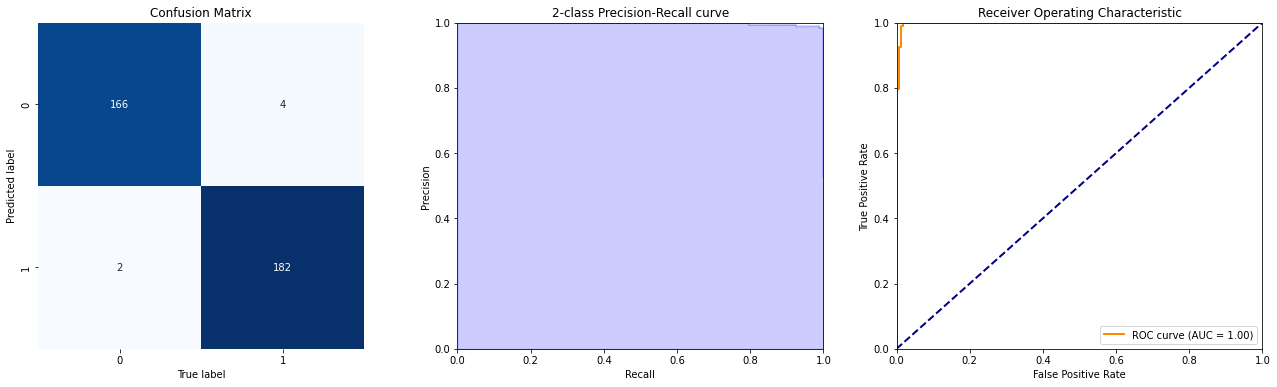




==========SUPPORT VECTOR MACHINES ==========


Accuracy : 0.9887 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9946 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9839 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9998                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


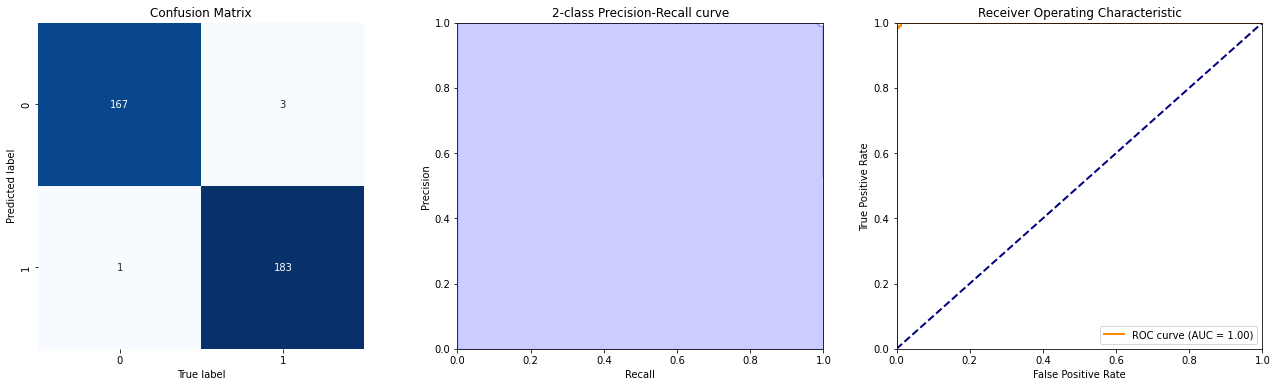




========== NAIVE BAYES ==========


Accuracy : 0.9407 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9064 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9892 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9381                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


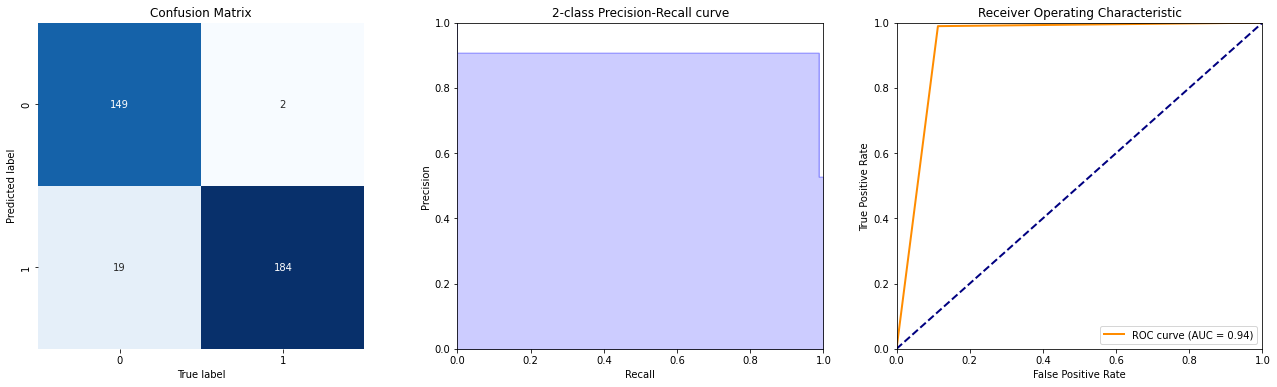




========== DECISION TREES ==========


Accuracy : 0.9661 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9394 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9643                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


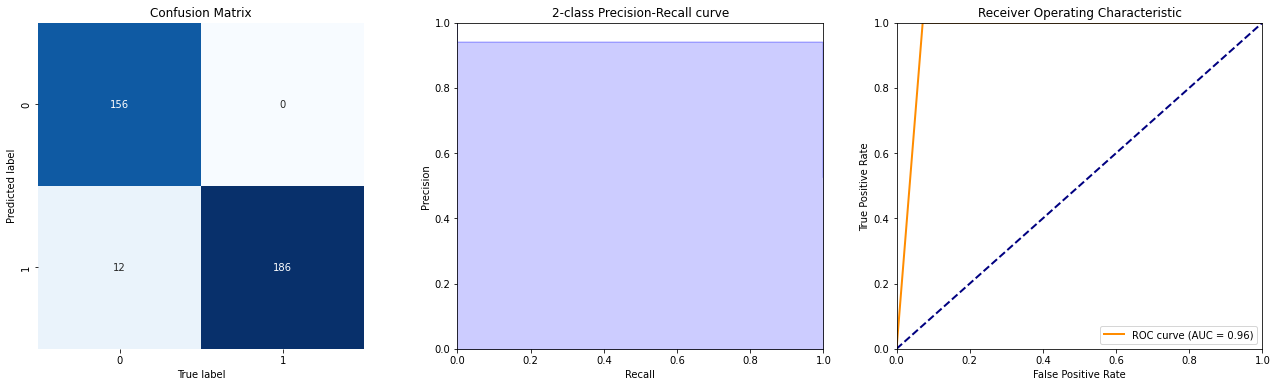

(0.9661016949152542, 0.9393939393939394, 1.0, 0.9642857142857143)

In [646]:
# summary reports of each of the models
print('\n\n')
print('========== LOGISTIC REGRESSION ==========')
print('\n')
show_summary_report(y_test, lr_predict, lr_proba)

print('\n\n')

print('==========SUPPORT VECTOR MACHINES ==========')
print('\n')
show_summary_report(y_test, svm_predict, svm_proba)

print('\n\n')

print('========== NAIVE BAYES ==========')
print('\n')
show_summary_report(y_test, nb_predict, nb_proba)


print('\n\n')

print('========== DECISION TREES ==========')
print('\n')
show_summary_report(y_test, dt_predict, dt_proba)

##### Observations
- Recall increased drastically
- Resampling of the dataset improved overall performance

## <b>6. Summary

- Models were effective in detecting spam messages
- With resampling, we were able to balance the dataset and improve overall performance – namely recall
- Recommendation
    - SVM Model
        - Performed well due to smaller dataset
        - More effective in higher dimensional spaces
        - Relatively memory efficient
- Further Improvements
    - Implementing hyper-parameters 
